In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from PIL import Image

In [126]:
dt1 = pd.read_csv('gender_submission.csv')
test_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')

survival - 생존유무, target 값. (0 = 사망, 1 = 생존)   
pclass   - 티켓 클래스. (1 = 1st, 2 = 2nd, 3 = 3rd)   
sex      - 성별   
Age      - 나이(세)   
sibsp    - 함께 탑승한 형제자매, 배우자 수 총합   
parch    - 함께 탑승한 부모, 자녀 수 총합   
ticket   - 티켓 넘버   
fare     - 탑승 요금   
cabin    - 객실 넘버   
embarked - 탑승 항구

In [127]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [128]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [129]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


+ Sex, Cabin, Embarked 에 빈데이터 존재   
+ PassengerId, Name 은 생존과 연관성을 찾기 어렵다고 판단


In [130]:
train_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Pclass는 1등석, 2등석, 3등석의 정보   
비어있는 데이터는 없음   
분포를 알아보기 위해 시각화

In [131]:
def bar_chart(feature):
    survived = train_data[train_data['Survived']==1][feature].value_counts()
    dead = train_data[train_data['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind = 'bar', stacked=True, figsize=(10,5))

생존자, 사망자를 feature 별로 나누어 그래프로 확인하는 함수

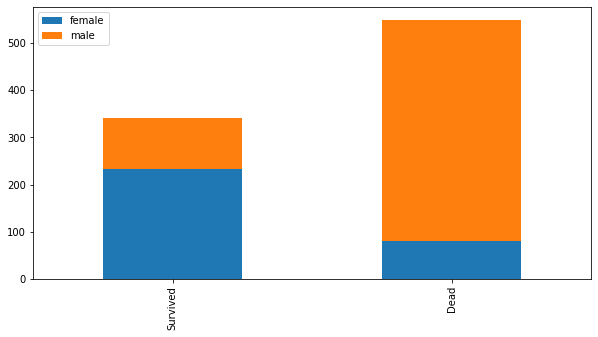

In [132]:
bar_chart('Sex')

여자는 상대적으로 많이 살아남았지만 남자는 많이 죽은 것을 알 수 있다

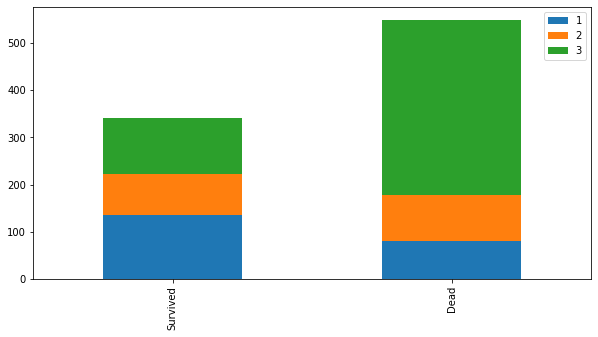

In [133]:
bar_chart('Pclass')

3등석이 상대적으로 많이 죽은 것을 확인할 수 있다

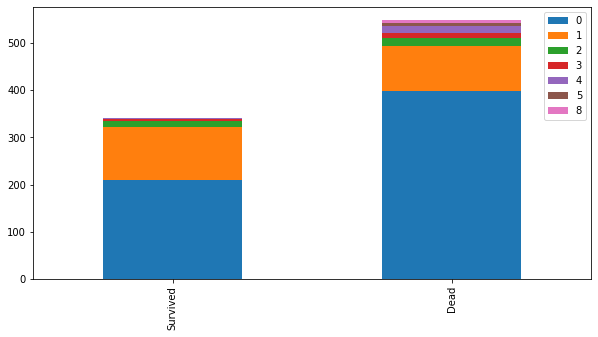

In [134]:
bar_chart('SibSp')

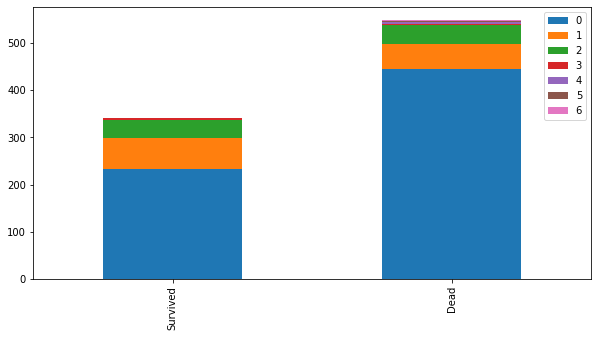

In [135]:
bar_chart('Parch')

위 2개의 그래프를 살펴보면 혼자 탔을 때 사망한 경우가 유의미하게 많은 것을 확인할 수 있음

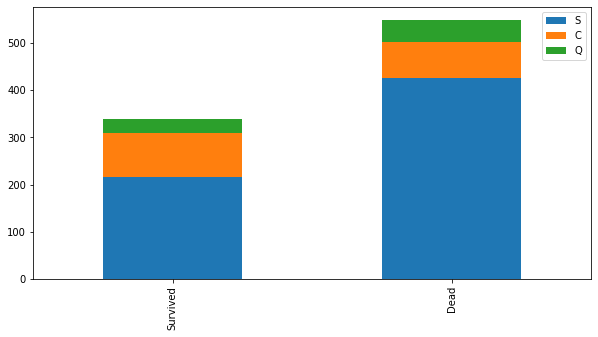

In [136]:
bar_chart('Embarked')

탑승 항구가 S인 경우 사망자가 더 많은 것을 확인

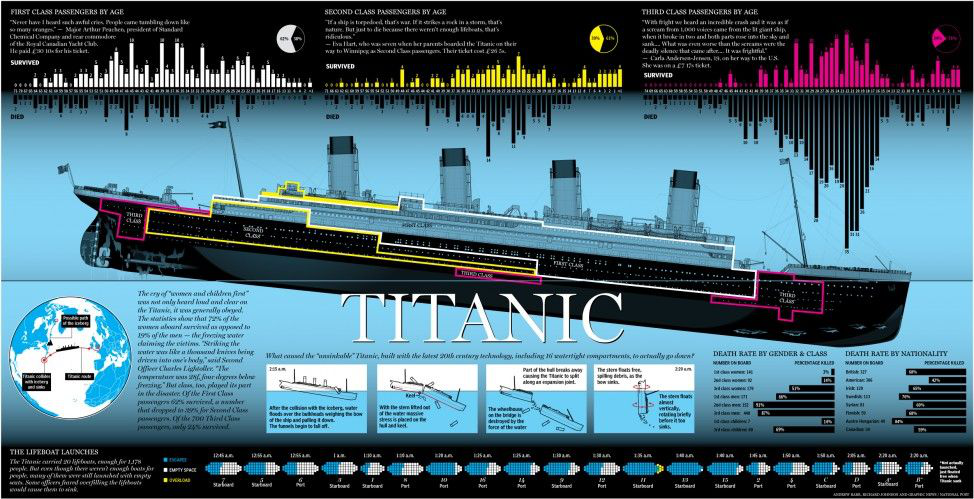

In [137]:
Image.open('titanic.jpg')

타이타닉호의 내부 구조를 보면 3등석이 양쪽에 존재하고 중간쪽엔 2등석 위쪽이 1등석인 것을 확인할 수 있음. 또한, 가라앉는 부분을 보면 우측 3등석이 먼저 물에 잠기는 것을 확인 할 수 있다.

# Name

In [138]:
train_test_data = [train_data, test_data]

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [139]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


데이터 Name에서 유의미한 정보만 추출

In [140]:
train_data['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Sir           1
Jonkheer      1
Ms            1
Don           1
Mme           1
Lady          1
Countess      1
Capt          1
Name: Title, dtype: int64

In [141]:
title_mapping = {"Mr" : 0, "Miss" : 1, "Mrs" : 2, "Master" : 3, "Dr" : 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3}
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)    

크게 Mr, Miss, Mrs과 나머지(Ohters)로 분류   
Mr     -> 0 (성인 남자)     
Miss   -> 1 (12세 미만 여자아이)   
Mrs    -> 2 (성인 여자)   
Ohters -> 3

In [142]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [143]:
train_data.drop('Name', axis = 1, inplace=True)
test_data.drop('Name', axis = 1, inplace=True)

In [144]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [145]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


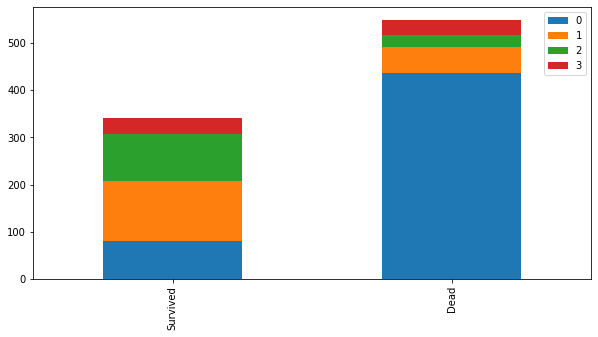

In [146]:
bar_chart('Title')

그래프를 보면 성인 남자의 사망자 수가 많은 것을 알 수 있다

# Sex

In [147]:
sex_mapping = {"male" : 0, "female" : 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

male -> 0   
female -> 1

In [148]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


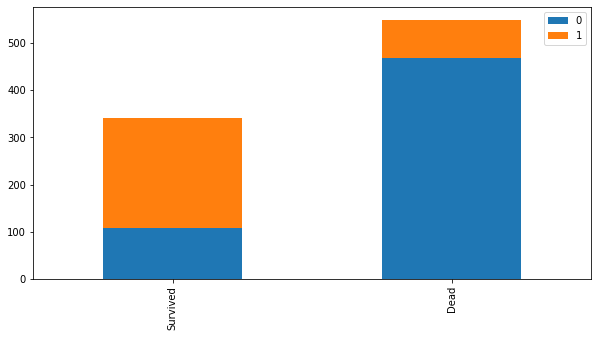

In [149]:
bar_chart('Sex')

상대적으로 여자보다 남자가 사망자 수가 많은 것을 알 수 있음

# Age

In [150]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


Age에는 결측값이 존재하므로 결측값을 처리해야함

In [151]:
train_data["Age"].fillna(train_data.groupby("Title")["Age"].transform("median"), inplace=True)
test_data["Age"].fillna(test_data.groupby("Title")["Age"].transform("median"), inplace=True)

In [152]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


### 나이별 생존, 사망자수 지표

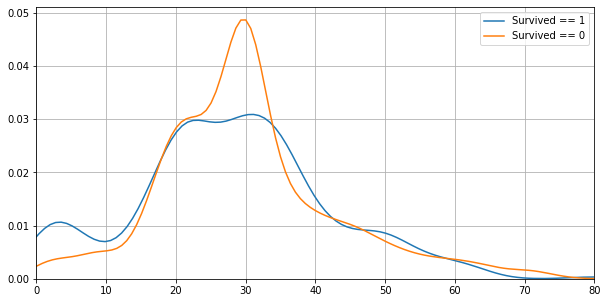

In [153]:
fig, ax = plt.subplots(figsize=(10,5))
sns.kdeplot(train_data[train_data['Survived']==1]['Age'], ax=ax)
sns.kdeplot(train_data[train_data['Survived']==0]['Age'], ax=ax)
ax.set(xlim=(0, train_data['Age'].max()))
plt.legend(['Survived == 1', 'Survived == 0'])
plt.grid(True)
plt.show()

### 0~20세

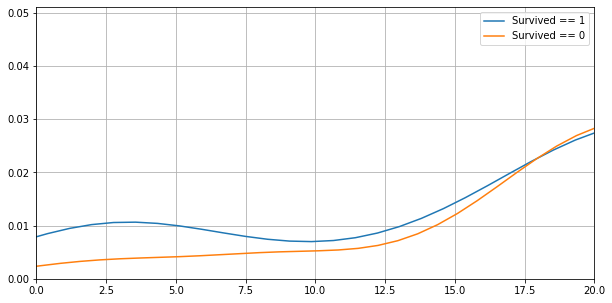

In [154]:
fig, ax = plt.subplots(figsize=(10,5))
sns.kdeplot(train_data[train_data['Survived']==1]['Age'], ax=ax)
sns.kdeplot(train_data[train_data['Survived']==0]['Age'], ax=ax)
ax.set(xlim=(0, train_data['Age'].max()))
plt.legend(['Survived == 1', 'Survived == 0'])
plt.grid(True)
plt.xlim(0, 20)
plt.show()

### 20~40세

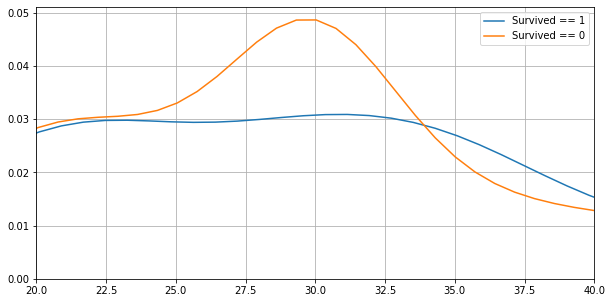

In [155]:
fig, ax = plt.subplots(figsize=(10,5))
sns.kdeplot(train_data[train_data['Survived']==1]['Age'], ax=ax)
sns.kdeplot(train_data[train_data['Survived']==0]['Age'], ax=ax)
ax.set(xlim=(0, train_data['Age'].max()))
plt.legend(['Survived == 1', 'Survived == 0'])
plt.grid(True)
plt.xlim(20, 40)
plt.show()

### 40~60세

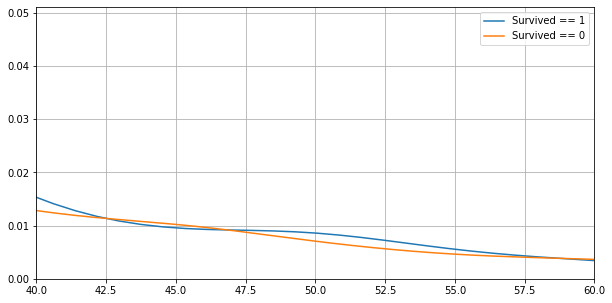

In [156]:
fig, ax = plt.subplots(figsize=(10,5))
sns.kdeplot(train_data[train_data['Survived']==1]['Age'], ax=ax)
sns.kdeplot(train_data[train_data['Survived']==0]['Age'], ax=ax)
ax.set(xlim=(0, train_data['Age'].max()))
plt.legend(['Survived == 1', 'Survived == 0'])
plt.grid(True)
plt.xlim(40, 60)
plt.show()

### 60~80세

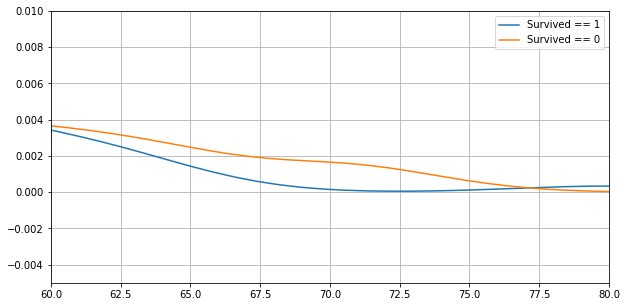

In [157]:
fig, ax = plt.subplots(figsize=(10,5))
sns.kdeplot(train_data[train_data['Survived']==1]['Age'], ax=ax)
sns.kdeplot(train_data[train_data['Survived']==0]['Age'], ax=ax)
ax.set(xlim=(0, train_data['Age'].max()))
plt.legend(['Survived == 1', 'Survived == 0'])
plt.grid(True)
plt.xlim(60, 80)
plt.ylim(-0.005, 0.01)
plt.show()

In [158]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 20, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 40), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 41) & (dataset['Age'] <= 60), 'Age'] = 2,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 3

0 -> 0-20세   
1 -> 21-40세   
2 -> 41-60세   
3 -> 61-80세

In [159]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,1.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,1.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,1.0,0,0,373450,8.0500,NaN,S,0


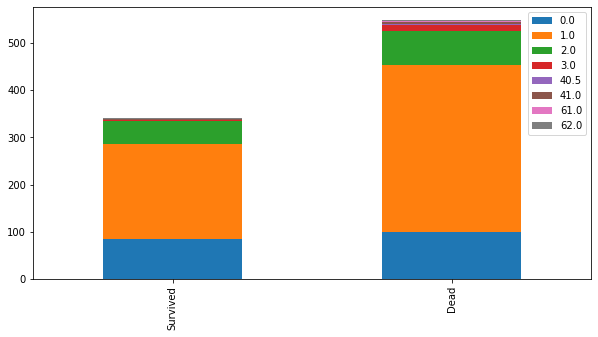

In [160]:
bar_chart('Age')

20-40대가 가장많이 사망한 것을 알 수 있음

# Embarked

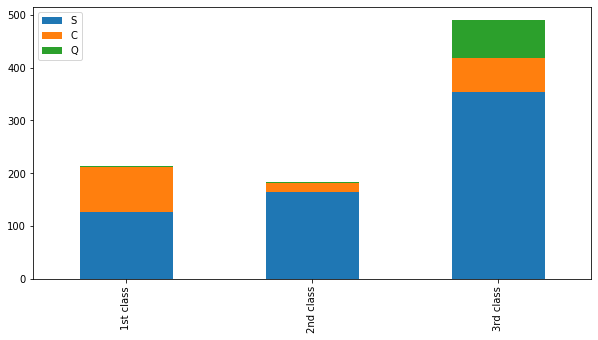

In [161]:
Pclass1 = train_data[train_data['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train_data[train_data['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train_data[train_data['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class','3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

2등석과 3등석은 대부분 S항구에서 많이 탄다고 볼 수 있음   
1등석은 C항구와 S항구에서 많이 타지만 과반수는 S항구   
그러므로 결측값을 S로 채워도 된다고 판단

In [162]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [163]:
train_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [164]:
embarked_mapping = {'S' : 0, 'C' : 1, 'Q' : 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [165]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,1.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,1.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,1.0,0,0,373450,8.0500,NaN,0,0


# Fare

가격표는 Pclass에 영향 받는다고 판단해 Pclass 별 중간값으로 결측값을 처리

In [166]:
train_data['Fare'].fillna(train_data.groupby('Pclass')['Fare'].transform('median'), inplace=True)
test_data['Fare'].fillna(test_data.groupby('Pclass')['Fare'].transform('median'), inplace=True)

In [167]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     891 non-null    int64  
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 83.7+ KB


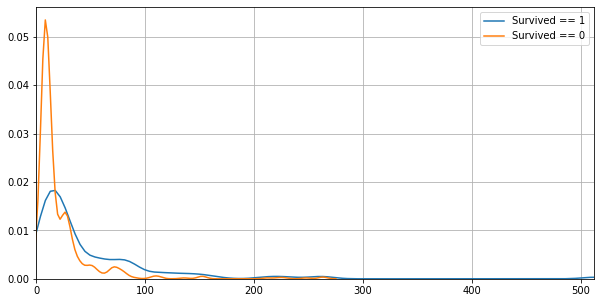

In [168]:
fig, ax = plt.subplots(figsize=(10,5))
sns.kdeplot(train_data[train_data['Survived']==1]['Fare'], ax=ax)
sns.kdeplot(train_data[train_data['Survived']==0]['Fare'], ax=ax)
ax.set(xlim=(0, train_data['Fare'].max()))
plt.legend(['Survived == 1', 'Survived == 0'])
plt.grid(True)
plt.show()

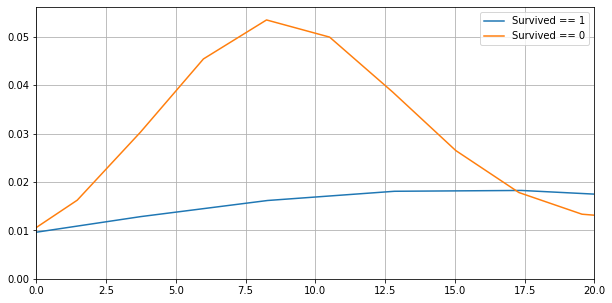

In [169]:
fig, ax = plt.subplots(figsize=(10,5))
sns.kdeplot(train_data[train_data['Survived']==1]['Fare'], ax=ax)
sns.kdeplot(train_data[train_data['Survived']==0]['Fare'], ax=ax)
ax.set(xlim=(0, train_data['Fare'].max()))
plt.legend(['Survived == 1', 'Survived == 0'])
plt.grid(True)
plt.xlim(0,20)
plt.show()

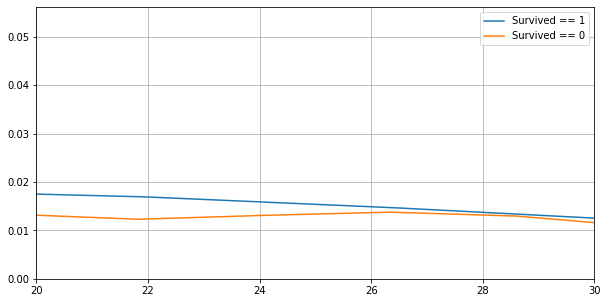

In [170]:
fig, ax = plt.subplots(figsize=(10,5))
sns.kdeplot(train_data[train_data['Survived']==1]['Fare'], ax=ax)
sns.kdeplot(train_data[train_data['Survived']==0]['Fare'], ax=ax)
ax.set(xlim=(0, train_data['Fare'].max()))
plt.legend(['Survived == 1', 'Survived == 0'])
plt.grid(True)
plt.xlim(20,30)
plt.show()

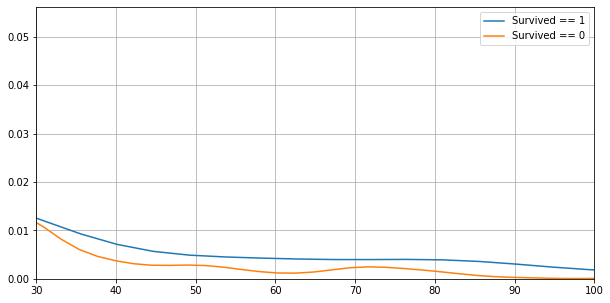

In [171]:
fig, ax = plt.subplots(figsize=(10,5))
sns.kdeplot(train_data[train_data['Survived']==1]['Fare'], ax=ax)
sns.kdeplot(train_data[train_data['Survived']==0]['Fare'], ax=ax)
ax.set(xlim=(0, train_data['Fare'].max()))
plt.legend(['Survived == 1', 'Survived == 0'])
plt.grid(True)
plt.xlim(30,100)
plt.show()

0-20 -> 0   
21-30 -> 1   
31-100 -> 2   
100- -> 3

In [172]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 20, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 20) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [173]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,1.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,1.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,1.0,0,0,373450,0.0,NaN,0,0


# Cabin

In [174]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     891 non-null    int64  
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 83.7+ KB


In [175]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

cabin은 결측값이 너무 많으므로 포함하지 않음

# SibSp, Parch

이 두가지 feature를 하나로 묶는 이유는 혼자 탔을 때와 두명 이상이 탔을 때의 사망률이 유의미하게 차이나기 때문

In [176]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

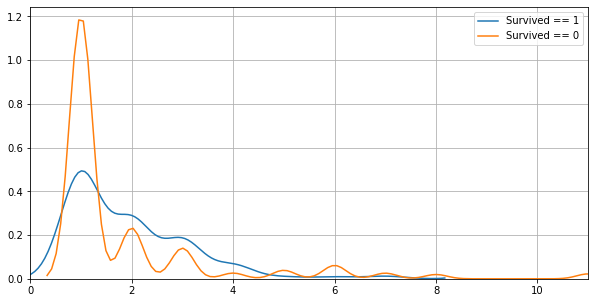

In [177]:
fig, ax = plt.subplots(figsize=(10,5))
sns.kdeplot(train_data[train_data['Survived']==1]['FamilySize'], ax=ax)
sns.kdeplot(train_data[train_data['Survived']==0]['FamilySize'], ax=ax)
ax.set(xlim=(0, train_data['FamilySize'].max()))
plt.legend(['Survived == 1', 'Survived == 0'])
plt.grid(True)
plt.show()

In [178]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [179]:
train_data.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0,0.4
1,2,1,1,1,1.0,1,0,PC 17599,2.0,C85,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1,0.0
3,4,1,1,1,1.0,1,0,113803,2.0,C123,0,2,0.4
4,5,0,3,0,1.0,0,0,373450,0.0,NaN,0,0,0.0
5,6,0,3,0,1.0,0,0,330877,0.0,NaN,2,0,0.0
6,7,0,1,0,2.0,0,0,17463,2.0,E46,0,0,0.0
7,8,0,3,0,0.0,3,1,349909,1.0,NaN,0,3,1.6
8,9,1,3,1,1.0,0,2,347742,0.0,NaN,0,2,0.8
9,10,1,2,1,0.0,1,0,237736,2.0,NaN,1,2,0.4


## 필요없는 feature를 삭제

In [180]:
features_drop = ['Ticket', 'Cabin', 'SibSp', 'Parch']
train_data = train_data.drop(features_drop, axis=1)
test_data = test_data.drop(features_drop, axis=1)
train_data = train_data.drop(['PassengerId'], axis=1)

In [181]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,0,1.0,0.0,0,0,0.4
1,1,1,1,1.0,2.0,1,2,0.4
2,1,3,1,1.0,0.0,0,1,0.0
3,1,1,1,1.0,2.0,0,2,0.4
4,0,3,0,1.0,0.0,0,0,0.0


In [182]:
target = train_data['Survived']
train_data = train_data.drop(['Survived'], axis=1)

In [183]:
train_data.head()

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,3,0,1.0,0.0,0,0,0.4
1,1,1,1.0,2.0,1,2,0.4
2,3,1,1.0,0.0,0,1,0.0
3,1,1,1.0,2.0,0,2,0.4
4,3,0,1.0,0.0,0,0,0.0


# Modelling

In [184]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [185]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Sex         891 non-null    int64  
 2   Age         891 non-null    float64
 3   Fare        891 non-null    float64
 4   Embarked    891 non-null    int64  
 5   Title       891 non-null    int64  
 6   FamilySize  891 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 48.9 KB


## Cross Validation (K-fold)

In [186]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

## kNN

In [187]:
clf = KNeighborsClassifier(n_neighbors=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)

In [188]:
print(score)

[0.82222222 0.7752809  0.79775281 0.82022472 0.82022472 0.84269663
 0.83146067 0.80898876 0.83146067 0.84269663]


kNN Score

In [189]:
round(np.mean(score)*100, 2)

81.93

## Decision Tree

In [191]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)

In [192]:
print(score)

[0.83333333 0.82022472 0.76404494 0.78651685 0.86516854 0.78651685
 0.86516854 0.7752809  0.7752809  0.82022472]


decision tree Score

In [193]:
round(np.mean(score)*100, 2)

80.92

## Random Forest

In [194]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83333333 0.83146067 0.7752809  0.75280899 0.86516854 0.79775281
 0.83146067 0.78651685 0.76404494 0.83146067]


Random Forest Score

In [195]:
round(np.mean(score)*100, 2)

80.69

## Naive Bayes

In [197]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83333333 0.7752809  0.78651685 0.68539326 0.73033708 0.79775281
 0.80898876 0.83146067 0.86516854 0.83146067]


Naive Bayes Score

In [198]:
round(np.mean(score)*100, 2)

79.46

## SVM

In [199]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81111111 0.76404494 0.80898876 0.7752809  0.76404494 0.80898876
 0.82022472 0.82022472 0.83146067 0.85393258]


SVM score

In [200]:
round(np.mean(score)*100, 2)

80.58

## Testing

kNN이 81.93으로 가장 높은 score를 기록 했으므로 kNN사용

In [205]:
clf = KNeighborsClassifier(n_neighbors=13)
clf.fit(train_data, target)

test_data_copy = test_data.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data_copy)

In [207]:
submission = pd.DataFrame({
    "PassengerId" : test_data["PassengerId"], "Survived" : prediction
})
submission.to_csv('submission.csv', index=False)

In [208]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


public score    
0.76315로 상당히 낮게 나옴   
개선할 점 찾아야함